In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


In [5]:
# Set base url and units variables, and combine them to get the query url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

# Create empty lists to store the data for each field
city_id_list = []
city_name_list = []
country_list = []
lng_list = []
lat_list = []
temp_list = []
humidity_list = []
clouds_list = []
wind_speed_list = []

# Loop through cities
for city in cities:
    
    # Get the JSON response from the OpenWeather API
    response_json = requests.get(query_url + city).json()
    
    # Start the error handling
    # Retrieve the items for each field and append them to the empty lists  
    try:
        
        city_id = response_json['id']
        city_id_list.append(city_id)
            
        city_name = response_json['name']
        city_name_list.append(city_name)
        
        country_name = response_json['sys']['country']
        country_list.append(country_name)

        lng = response_json['coord']['lon']
        lng_list.append(lng)

        lat = response_json['coord']['lat']
        lat_list.append(lat)

        temp = response_json['main']['temp']
        temp_list.append(temp)

        humidity = response_json['main']['humidity']
        humidity_list.append(humidity)

        clouds = response_json['clouds']['all']
        clouds_list.append(clouds)

        wind_speed = response_json['wind']['speed']
        wind_speed_list.append(wind_speed)
    
        print(f"City Name: {city}, City ID: {city_id}")
    
        
    #Print error message and move to the next city
    except:
        print("City not found,Skipping...")
        

City Name: tara, City ID: 1490140
City Name: port-aux-francais, City ID: 1546102
City Name: kolondieba, City ID: 2454934
City Name: hamilton, City ID: 4513583
City Name: adamstown, City ID: 4030723
City Name: albany, City ID: 5106841
City Name: shingu, City ID: 1847947
City Name: dudinka, City ID: 1507116
City Name: pisco, City ID: 3932145
City Name: waitangi, City ID: 4032804
City Name: sinop, City ID: 739598
City Name: lihue, City ID: 5850248
City Name: edinburgh of the seven seas, City ID: 3370726
City Name: brookings, City ID: 5226534
City Name: fortuna, City ID: 5563839
City Name: egilsstadir, City ID: 6354943
City Name: tazovsky, City ID: 1489853
City Name: totness, City ID: 3382867
City Name: port elizabeth, City ID: 964420
City Name: grytviken, City ID: 3426466
City Name: necochea, City ID: 3430443
City Name: puerto natales, City ID: 3874958
City Name: invercargill, City ID: 2189529
City Name: kuching, City ID: 1735634
City Name: talnakh, City ID: 1490256
City Name: orivesi, Ci

City Name: teays valley, City ID: 4824469
City Name: callao, City ID: 3946083
City Name: al burayqah, City ID: 2215210
City Name: sofo-birnin-gwari, City ID: 2347061
City Name: arica, City ID: 3899361
City Name: shamva, City ID: 881345
City Name: berdigestyakh, City ID: 2026861
City Name: zhangatas, City ID: 1516788
City Name: myrina, City ID: 256930
City Name: emerald, City ID: 2167426
City Name: mumford, City ID: 2297810
City Name: shahrud, City ID: 135423
City Name: bom jesus, City ID: 3405304
City Name: vilyuysk, City ID: 2013392
City Name: vadso, City ID: 777073
City Name: mata-utu, City ID: 4034821
City Name: tabas, City ID: 113659
City Name: kerikeri, City ID: 2188874
City Name: selma, City ID: 5394329
City Name: cabo san lucas, City ID: 3985710
City Name: along, City ID: 1278969
City Name: port alfred, City ID: 964432
City Name: khandyga, City ID: 2022773
City Name: hola, City ID: 756316
City Name: zeya, City ID: 2012593
City Name: bengkulu, City ID: 1649150
City Name: midvagur

City Name: vallenar, City ID: 3868633
City not found,Skipping...
City Name: gaigeturi, City ID: 1847050
City Name: portland, City ID: 5746545
City Name: artesia, City ID: 5324862
City Name: vilyuchinsk, City ID: 2118647
City Name: bubaque, City ID: 2374583
City Name: horta, City ID: 3372988
City Name: rongelap, City ID: 7306520
City Name: ugoofaaru, City ID: 1337619
City Name: chos malal, City ID: 3861262
City Name: lazaro cardenas, City ID: 4026082
City Name: ketchikan, City ID: 5554428
City Name: kargasok, City ID: 1504382
City Name: massa marittima, City ID: 3173758
City Name: hammerfest, City ID: 779683
City Name: rajapur, City ID: 1258911
City Name: veselyy, City ID: 474059
City Name: ciutadella, City ID: 3124967
City Name: beipiao, City ID: 2038342
City Name: inhambane, City ID: 1045114
City Name: darwin, City ID: 2073124
City Name: ada, City ID: 5583739
City Name: ulysses, City ID: 5446683
City Name: mana, City ID: 3381041
City not found,Skipping...
City Name: fale old settlemen

In [6]:
# Convert the cities weather data into a Pandas DataFrame
cities_df = pd.DataFrame({"City ID": city_id_list, "City" : city_name_list, "Country": country_list,
                         "Lat": lat_list, "Lng": lng_list, "Temperature" : temp_list,
                         "Humidity" : humidity_list, "Clouds": clouds_list, "Wind Speed": wind_speed_list})

# Show record count
cities_df.count()

City ID        568
City           568
Country        568
Lat            568
Lng            568
Temperature    568
Humidity       568
Clouds         568
Wind Speed     568
dtype: int64

In [7]:
#Display Sample Data
cities_df.head()

,City ID,City,Country,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed
0,1490140,Tara,RU,56.8944,74.3710,62.35,96,86,6.20
1,1546102,Port-aux-Français,TF,-49.3500,70.2167,35.56,60,64,37.47
2,2454934,Kolondiéba,ML,11.0882,-6.8926,85.89,59,83,8.50
3,4513583,Hamilton,US,39.1834,-84.5333,86.18,68,75,9.22
4,4030723,Adamstown,PN,-25.0660,-130.1015,73.24,80,99,36.13


In [8]:
#Export to .csv file
cities_df.to_csv("Output/city_weather.csv", index = False, header = True)

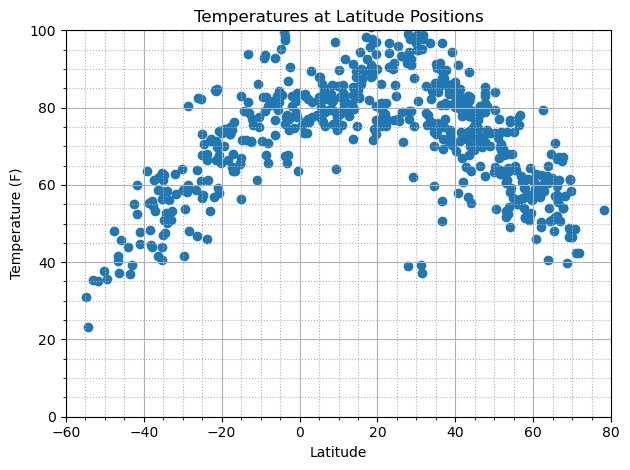

In [9]:
# CREATE THE SCATTER PLOTS REQUESTED
#Latitude Vs. Temperature

# Build scatter plot for latitude vs. temperature
x_values = cities_df["Lat"]
y_values = cities_df["Temperature"]

# Incorporate the other graph properties
plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(0, 100)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()

# Save the figure
plt.savefig("Images/lat_temp.png")

# Show plot
plt.show()

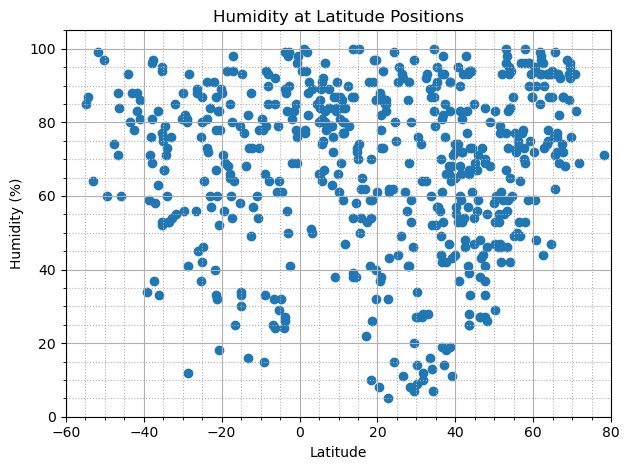

In [10]:
#Latitude Vs. Humidity

# Build the scatter plots for latitude vs. humidity
x_values = cities_df["Lat"]
y_values = cities_df["Humidity"]

# Incorporate the other graph properties
plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()

# Save the figure
plt.savefig("Images/lat_humid.png")

# Show plot
plt.show()

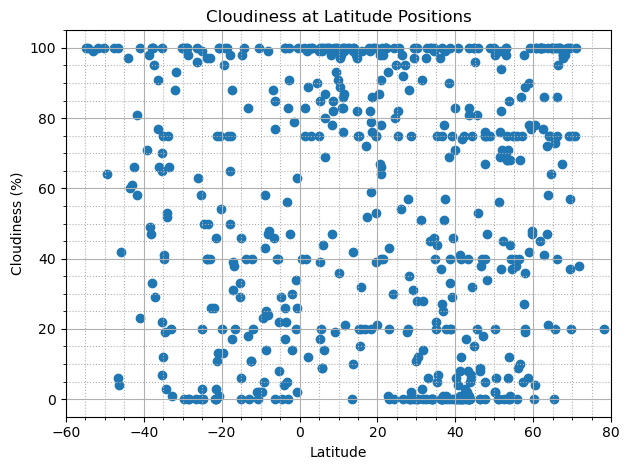

In [11]:
#Latitude Vs. Cloudiness

# Build the scatter plots for latitude vs. humidity
x_values = cities_df["Lat"]
y_values = cities_df["Clouds"]

# Incorporate the other graph properties
plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()

# Save the figure
plt.savefig("Images/lat_cloud.png")

# Show plot
plt.show()

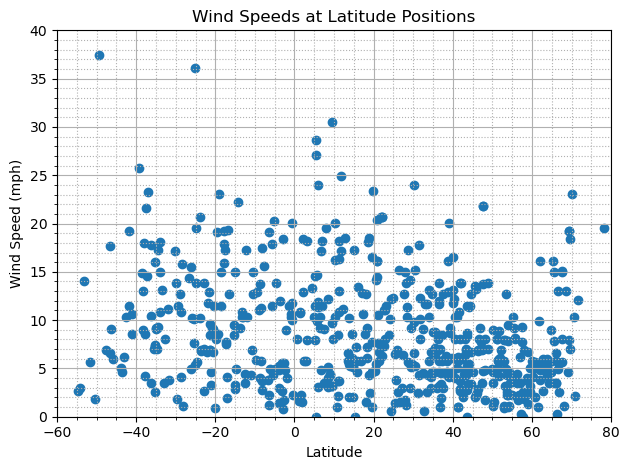

In [12]:
#Latitude Vs. Wind Speed Plot

# Build the scatter plots for latitude vs. humidity
x_values = cities_df["Lat"]
y_values = cities_df["Wind Speed"]

# Incorporate the other graph properties
plt.scatter(x_values,y_values)
plt.title('Wind Speeds at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 40)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()

# Save the figure
plt.savefig("Images/lat_wind.png")

# Show plot
plt.show()

In [13]:
#REQUIREMENT 2: COMPUTE LINEAR REGRESSION FOR EACH RELATIONSHIP

#Create a function to create Linear Regression plots

def linear_regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_value, y_values)
    regress_values = x_values * slope + intercept
    
    line_eq = "y= "+ str(round(slope,2)) + "x + " + str(round(intercept,2))
    correlation = st.pearsonr(x_values, y_values)
    
    print(f"r-squared: {rvalue**2}")
    print(f"Correlation : {correlation}")
    print(f"Line : {line_eq}")
   
    return regress_values, line_eq

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
mask = cities_df['Lat'] >0

northern_hemisphere = cities_df[mask]

# Display sample data
northern_hemisphere.head()

,City ID,City,Country,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed
0,1490140,Tara,RU,56.8944,74.3710,62.35,96,86,6.20
2,2454934,Kolondiéba,ML,11.0882,-6.8926,85.89,59,83,8.50
3,4513583,Hamilton,US,39.1834,-84.5333,86.18,68,75,9.22
5,5106841,Albany,US,42.6001,-73.9662,82.53,48,3,1.99
6,1847947,Shingū,JP,33.7333,135.9833,75.52,87,100,4.27


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
mask = cities_df['Lat'] < 0

southern_hemisphere = cities_df[mask]

# Display sample data
southern_hemisphere.head()

,City ID,City,Country,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed
1,1546102,Port-aux-Français,TF,-49.3500,70.2167,35.56,60,64,37.47
4,4030723,Adamstown,PN,-25.0660,-130.1015,73.24,80,99,36.13
8,3932145,Pisco,PE,-13.7000,-76.2167,71.65,68,40,9.22
9,4032804,Waitangi,NZ,-43.9535,-176.5597,43.83,93,97,5.01
12,3370726,Edinburgh of the Seven Seas,SH,-37.0676,-12.3116,53.28,58,29,23.26


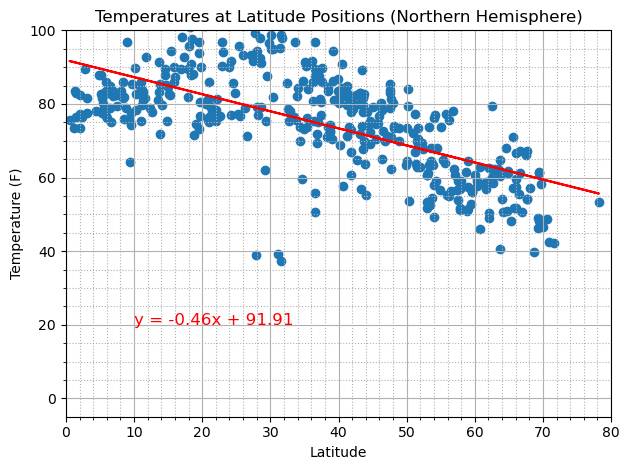

<Figure size 640x480 with 0 Axes>

In [16]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression

x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Temperature"]



(slope, intercept, rvalue, pvalue, strderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = "+ str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values,y_values)

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(-5, 100)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/nh_lat_temp_regression.png")

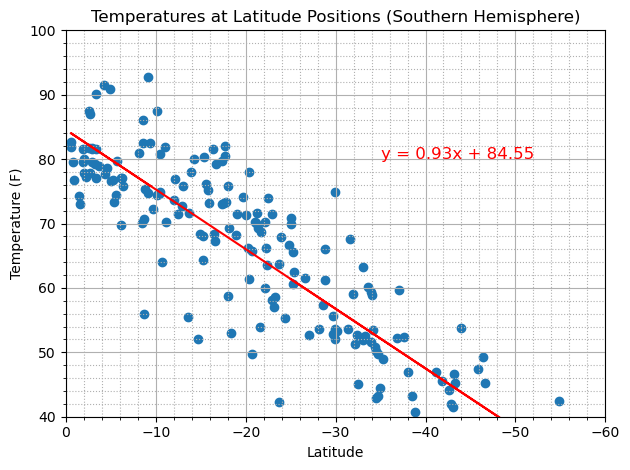

<Figure size 640x480 with 0 Axes>

In [33]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression

x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,80),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(40, 100)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/sh_lat_temp_regression.png")

In [35]:
# Discussion about the linear Relationship:

#Answer

Max Temp vs. Latitude Linear Regression

Both the Northern and Southern Hemispheres show the same inverse relationship between latitude
and temperature. As you get closer to the equator (latitude 0) the higher the temperature gets. 
There is a strong correlation for both hemishperes, but the Northern Hemisphere seems to have an almost one to one relationship.

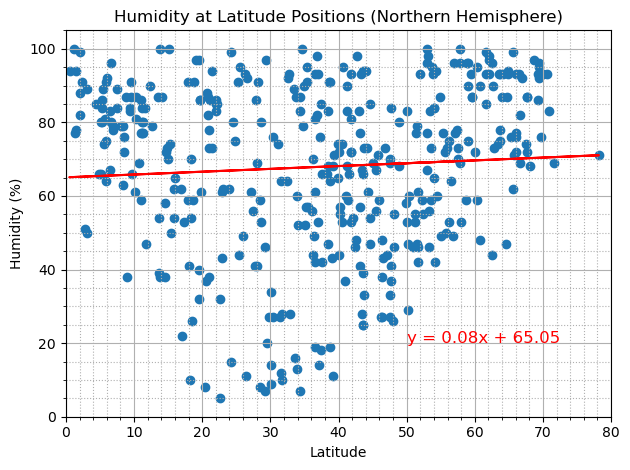

<Figure size 640x480 with 0 Axes>

In [17]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/nh_lat_humid_regression.png")

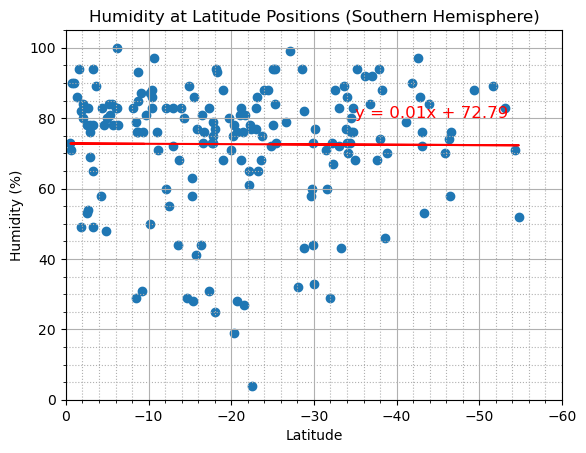

<Figure size 640x480 with 0 Axes>

In [38]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,80),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.show()
plt.savefig("Images/sh_lat_humid_regression.png")

In [ ]:
# Discussion about the linear relationship:Humidity % vs. Latitude Linear Regression

#Answer

There does not seem to be a very strong correlation between humidity and latitude. 
However, there does seem to be a slight positive correlation in the Northern Hemisphere 
and a slight negative correlation in the Southern Hemisphere; meaning in the Northern Hemisphere 
as you get further away from the equator (latitude 0) humidity increases, and in the Southern Hemisphere it decreases 
as you get further away from the equator.

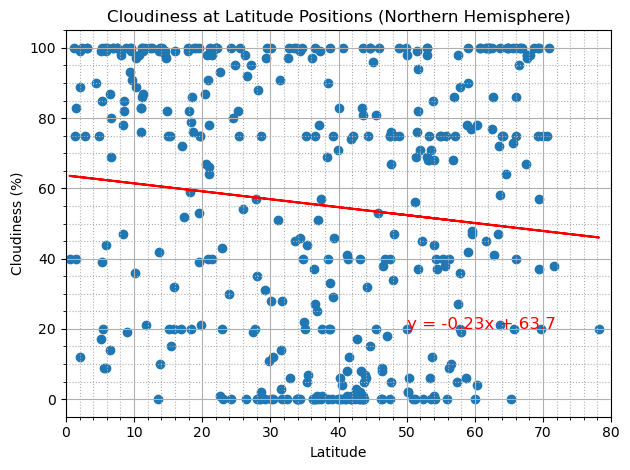

<Figure size 640x480 with 0 Axes>

In [18]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Clouds"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/nh_lat_clouds_regression.png")

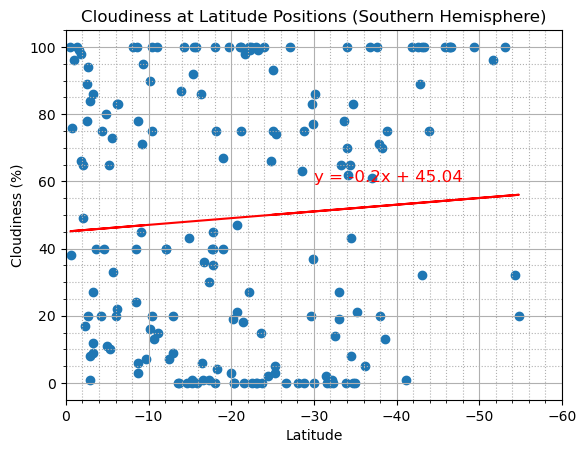

<Figure size 640x480 with 0 Axes>

In [40]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Clouds"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.show()
plt.savefig("Images/sh_lat_clouds_regression.png")

In [ ]:
# Discussion about the linear relationship: Cloudiness vs. Latitude Linear Regression

#Answer

There does not seem to be much correlation between cloudiness and latitude when you look at the plots.
However, when the linear regression is performed, you can see that there is a slight positive correlation 
in the Northern Hemisphere but a strong negative correlation in the Southern Hemisphere.
In the Southern Hemisphere it shows that the further you are from the equator (latitude 0) the less cloudy it is.

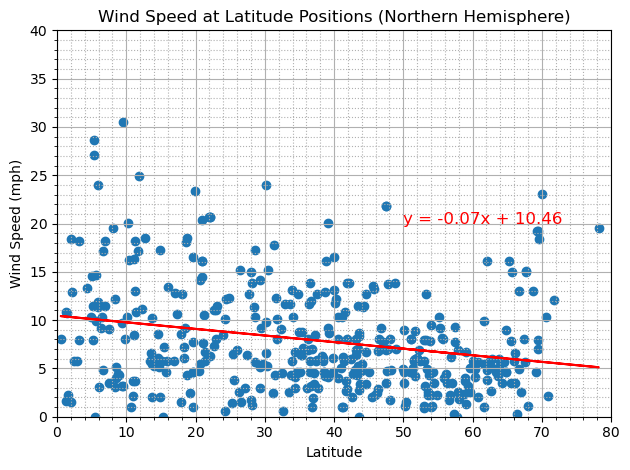

<Figure size 640x480 with 0 Axes>

In [19]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Wind Speed at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 40)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/nh_lat_wind_regression.png")

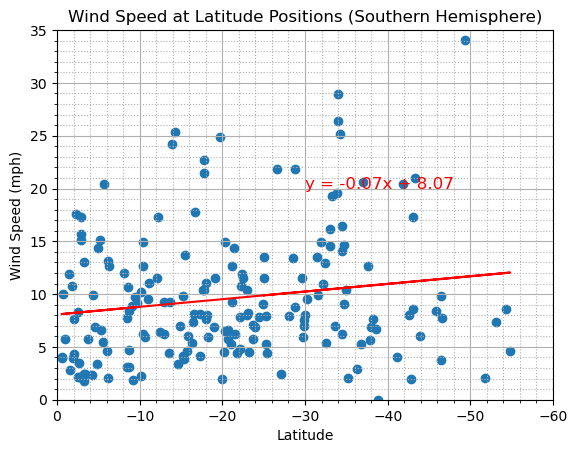

<Figure size 640x480 with 0 Axes>

In [42]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Wind Speed at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 35)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.show()
plt.savefig("Images/sh_lat_wind_regression.png")

In [ ]:
# Discussion about the linear relationship: Wind Speed vs. Latitude Linear Regression

There does seem to be a pretty strong correlation between wind sped and latitude when you look at the plots. 
However, the linear regresion shows a much lower correlation than it appears. There is still a definite correlation 
in both hemispheres, in that the further you are from the equator (latitude 0) the higher the wind speeds are, 
but the slope of the regression line is much shallower than I was expecting looking at the plots.